# Read clusters

In [1]:
#add the dev version of aare
import sys
sys.path.append('/home/l_msdetect/erik/aare/build')



#Our normal python imports
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

#Rendering version
from IPython.display import Markdown, display
try:
    from importlib import metadata
    v = metadata.version('aare')
except:
    v = 'dev'
    
s = f'Example run on: **{dt.now():%Y-%m-%d %H:%M}** with aare: **{v}**'
display(Markdown(s))



Example run on: **2024-11-14 17:05** with aare: **dev**

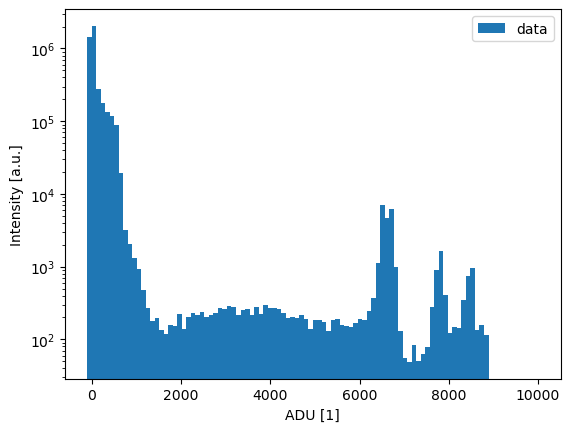

In [2]:
from aare import ClusterFile
import boost_histogram as bh


base = Path('/mnt/sls_det_storage/matterhorn_data/aare_test_data/ci/aare_test_data/clusters/')
fname = 'beam_En700eV_-40deg_300V_10us_d0_f0_100.clust'

# Create the histogram
n_bins = 100
xmin = -100
xmax = 1e4
hist1 = bh.Histogram(bh.axis.Regular(n_bins, xmin, xmax))

#Read clusters and fill the histogram with pixel values
with ClusterFile(base/fname, chunk_size = 10000) as f:
    for clusters in f:
        hist1.fill(clusters['data'].flat)

#


#Plotting
fig, ax = plt.subplots()
ax.bar(hist1.axes[0].centers, hist1.values(), width=hist1.axes[0].widths, label = 'data')
ax.set_yscale('log')
ax.set_xlabel('ADU [1]')
ax.set_ylabel('Intensity [a.u.]')
ax.legend()